In [ ]:
# from __future__ import division

In [454]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import cv2
import pylab
import math
import matplotlib.pyplot as plt
from skimage.io import imread, imsave
from skimage import transform as tf
from sklearn import mixture
from sklearn import linear_model
pathname = '/home/pboord/flask/maxvp/app/static'
#img = cv2.imread(pathname+'/No.274, Section 2, Bade Road, Taipei, Taiwan.jpg')
img = cv2.imread(pathname+'/yelpHongKong4.jpg')
#img = cv2.imread(pathname+'/128-134 Camp Street.jpg')
#img = cv2.imread(pathname+'/121KweilinStreet.jpg')
#img = cv2.imread(pathname+'/21 Gough Street.jpg')
#img = cv2.imread(pathname+'/30 Pak Tin Street.jpg')
#img = cv2.imread(pathname+'/52-56 Pei Ho Street.jpg')
#img = cv2.imread(pathname+'/105 Argyle Street.jpg')
#img = cv2.imread(pathname+'/118-120 Fuk Wa Street.jpg')
#img = cv2.imread(pathname+'/140 Tai Po Road.jpg')
#img = cv2.imread(pathname+'/Address: 2F, No. 128 Songjiang Road, Zhongshan District, Taipei 104, Taiwan.jpg')
#img = cv2.imread(pathname+'/Lai Chi Kok Road.jpg')
#img = cv2.imread(pathname+'/No.50 Section 1, Nanchang Road, Zhongzheng District, Taipei, Taiwan.jpg')
#img = cv2.imread(pathname+'/No.274, Section 2, Bade Road, Taipei, Taiwan.jpg')
#img = cv2.imread(pathname+'/yelpHongKong4.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
H, W = img.shape[:2]
def imshow(im):
    cv2.imshow('image', color_dst)
    cv2.waitKey(0) 
    cv2.destroyAllWindows()
def add_lines_to_image(im, lines):
    for i in range(0,lines.shape[0]):
        cv2.line(im,(lines[i][0],lines[i][1]), (lines[i][2],lines[i][3]),(0,0,255),3,8 )
    return im
def line_scatter(lines, **kwargs):
    if len(a) == 0:
        # slope displayed in 2D
        m2d = np.absolute(np.column_stack((lines[:,2] - lines[:,0], lines[:,3] - lines[:,1])))
        fig, ax = plt.subplots()
        ax.scatter(m2d[:,0],m2d[:,1])
    else:
        fig.suptitle(kwargs['title'], fontsize=20, y = 1.08)
        ax.set_xlabel(kwargs['xlabel'], fontsize=20)
        ax.set_ylabel(kwargs['ylabel'], fontsize=20)
def im_to_canny(im):
    # Canny
    # http://docs.opencv.org/2.4/doc/tutorials/imgproc/imgtrans/canny_detector/canny_detector.html
    thrs1 = 50
    thrs2 = 200
    canny = cv2.Canny(im, thrs1, thrs2, apertureSize=3)
    return canny
def canny_to_lines(canny):
    #cv2.imshow('Canny', canny)
    #cv2.imwrite(pathname+'/Canny.jpg',canny)
    # http://docs.opencv.org/2.4/modules/imgproc/doc/feature_detection.html#houghlinesp
    lines = cv2.HoughLinesP(canny,1, np.pi/180, 80, 30, 10)[:,0,:]
    return lines
def line_to_angle(lines):
    # lines: (N, 4) ndarray of N x 4-element vector  (x_1, y_1, x_2, y_2) , where  (x_1,y_1) and  (x_2, y_2) are the ending points of each line
    #angles = np.arctan2(lines[:,3] - lines[:,1], lines[:,2] - lines[:,0]) * 180 / np.pi
    angles = np.arctan(np.true_divide(lines[:,3] - lines[:,1], lines[:,2] - lines[:,0]))
    return angles
def angle_to_gmm(angles):
    gmm = mixture.GaussianMixture(n_components=2, covariance_type='spherical').fit(np.absolute(m))
    classMost = gmm.predict(np.absolute(m))==0
def angle_to_gmm3(angles):
    cos_sin_angle = np.c_[np.cos(2 * angles),np.sin(2 * angles)]
    #gmm = mixture.GaussianMixture(n_components=3, covariance_type='spherical').fit(cos_sin_angle)
    gmm = mixture.GaussianMixture(n_components=3, covariance_type='diag').fit(cos_sin_angle)
    class_predict = gmm.predict(cos_sin_angle)
    return class_predict
def principal_edges(angles, class_predict):
    nr_class = np.max(class_predict) + 1
    class_angles = np.zeros((nr_class,))
    for c in range(0,nr_class):
        class_c_angles = angles[class_predict==c]
        class_c_mean_angle = np.angle(np.sum(np.exp(1j*class_c_angles)))
        class_angles[c] = class_c_mean_angle
    print np.argmin(np.abs(class_angles))
    # select class closest to vanishing point horizon
    principal_class = class_predict == np.argmin(np.abs(class_angles))
    return principal_class
def robust_regressor(height, angles, principal_class):
    principal_indices = np.nonzero(principal_class)
    height = height[principal_class]
    angles = angles[principal_class]
    # Robustly fit linear model with RANSAC algorithm
    model_ransac = linear_model.RANSACRegressor(linear_model.LinearRegression())
    model_ransac.fit(np.c_[height,np.ones((height.shape[0],))], angles)
    inlier_mask = model_ransac.inlier_mask_
    principal_class.flat[np.nonzero(principal_class)] = inlier_mask
    return principal_class
H, W

(1000, 1000)

In [452]:
principal_class = principal_edges(angles, class_predict)
lines_y = lines[:,[1,3]]
height = np.average(lines_y,axis=1)
principal_inlier_class = robust_regressor(height, angles, principal_class)
principal_class.shape, principal_inlier_class.shape

1


((470,), (470,))

In [450]:
principal_class.flat[np.nonzero(principal_class)] = inlier_mask
principal_class.shape

(470,)

In [423]:
from sklearn import linear_model, datasets
n_samples = 1000
n_outliers = 50


X, y, coef = datasets.make_regression(n_samples=n_samples, n_features=1,
                                      n_informative=1, noise=10,
                                      coef=True, random_state=0)
np.random.seed(0)
X[:n_outliers] = 3 + 0.5 * np.random.normal(size=(n_outliers, 1))

In [427]:
y.shape

(1000,)

In [419]:
av_y.shape

(183,)

/home/pboord/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:64: RuntimeWarning: divide by zero encountered in true_divide


0


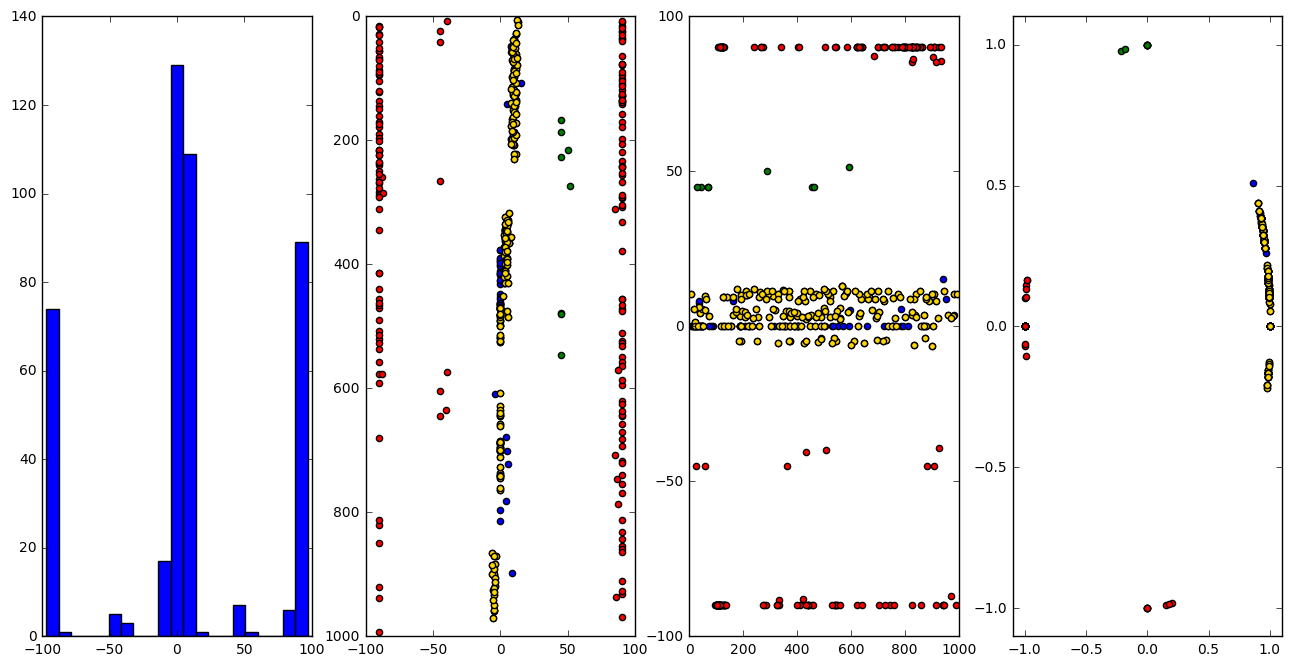

In [456]:
canny = im_to_canny(gray)
lines = canny_to_lines(canny)
angles = line_to_angle(lines)
class_predict = angle_to_gmm3(angles)
principal_class = principal_edges(angles, class_predict)
lines_x = lines[:,[0,2]]
lines_y = lines[:,[1,3]]
height = np.average(lines_y,axis=1)
principal_inlier_class = robust_regressor(height, angles, principal_class)
fig, ax = plt.subplots(nrows=1, ncols = 4, figsize=(16, 8))
ax[0].hist(angles * 180 / np.pi, bins=np.linspace(-180,180,40))
ax[0].set_xlim(left = -100, right = 100)
ax[1].scatter(angles[class_predict==0] * 180 / np.pi,np.average(lines_y[class_predict==0,:],axis=1),c='b')
ax[1].scatter(angles[class_predict==1] * 180 / np.pi,np.average(lines_y[class_predict==1,:],axis=1),c='r')
ax[1].scatter(angles[class_predict==2] * 180 / np.pi,np.average(lines_y[class_predict==2,:],axis=1),c='g')
ax[1].scatter(angles[principal_inlier_class] * 180 / np.pi,np.average(lines_y[principal_inlier_class,:],axis=1),c='gold')
ax[1].set_ylim(bottom = H, top = 0)
ax[1].set_xlim(left = -100, right = 100)
ax[2].scatter(np.average(lines_x[class_predict==0,:],axis=1),angles[class_predict==0] * 180 / np.pi,c='b')
ax[2].scatter(np.average(lines_x[class_predict==1,:],axis=1),angles[class_predict==1] * 180 / np.pi,c='r')
ax[2].scatter(np.average(lines_x[class_predict==2,:],axis=1),angles[class_predict==2] * 180 / np.pi,c='g')
ax[2].scatter(np.average(lines_x[principal_inlier_class,:],axis=1),angles[principal_inlier_class] * 180 / np.pi,c='gold')
ax[2].set_ylim(bottom = -100, top = 100)
ax[2].set_xlim(left = 0, right = W)
ax[3].scatter(np.cos(2 * angles[class_predict==0]),np.sin(2 * angles[class_predict==0]),c='b')
ax[3].scatter(np.cos(2 * angles[class_predict==1]),np.sin(2 * angles[class_predict==1]),c='r')
ax[3].scatter(np.cos(2 * angles[class_predict==2]),np.sin(2 * angles[class_predict==2]),c='g')
ax[3].scatter(np.cos(2 * angles[principal_inlier_class]),np.sin(2 * angles[principal_inlier_class]),c='gold')
ax[3].set_xlim(left = -1.1, right = 1.1)
ax[3].set_ylim(bottom = -1.1, top = 1.1)
plt.show()

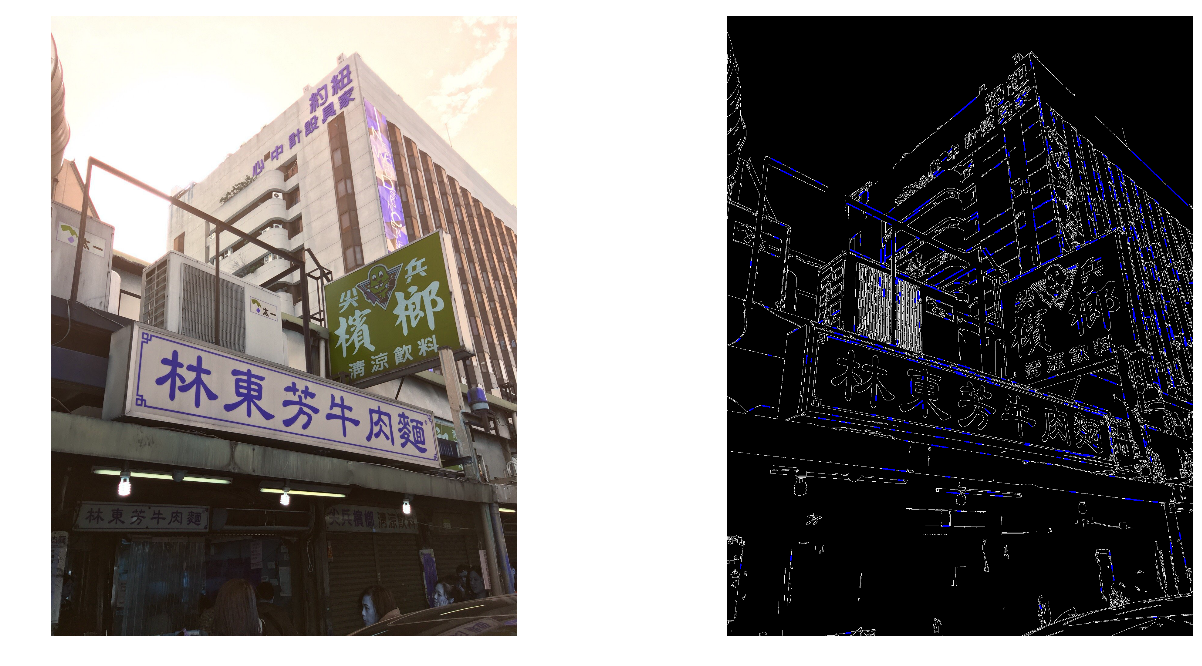

In [310]:
# with Vert
color_dst = cv2.cvtColor(canny,cv2.COLOR_GRAY2BGR)
color_dst = add_lines_to_image(color_dst, lines)
fig, figAx = plt.subplots(nrows=1, ncols = 2, figsize=(16, 8))
figAx[0].imshow(img)
figAx[1].imshow(color_dst)
for ax in figAx:
    ax.axis('off')

In [132]:
cv2.imshow('withVert', color_dst)
cv2.imwrite(pathname+'/withVert.jpg',color_dst)
# without Vert
# delete vertical lines (avoids divide by zero)
lines = lines[lines[:,0] != lines[:,2],:]
m = np.true_divide(lines[:,3] - lines[:,1],lines[:,2] - lines[:,0])
# # delete line with max abs slope > 2 (45 degrees)
# lines = lines[np.absolute(m) < 2,:]
# m = m[np.absolute(m) < 2]
# # keep lines only from largest subset
# m = m[:,np.newaxis]
# from sklearn import mixture
# gmm = mixture.GaussianMixture(n_components=2, covariance_type='spherical').fit(np.absolute(m))
# classMost = gmm.predict(np.absolute(m))==0
# if np.sum(classMost) < m.shape[0]/2:
#     classMost = np.logical_not(classMost)
# lines = lines[classMost,:]
# m = m[classMost]
# m = m[:,0]

color_dst = cv2.cvtColor(canny,cv2.COLOR_GRAY2BGR)
for i in range(0,lines.shape[0]):
    cv2.line(color_dst,(lines[i][0],lines[i][1]), (lines[i][2],lines[i][3]),(0,0,255),3,8 )
cv2.imshow('withoutVert', color_dst)
cv2.imwrite(pathname+'/withoutVert.jpg',color_dst)
cv2.waitKey(0) 
cv2.destroyAllWindows()

In [121]:
# delete horizontal lines (they don't have info to estimate vp & avoids div by zero)
lines = lines[m != 0,:]
m = m[m != 0]
import numpy.matlib
A = np.column_stack( ( np.ones((m.shape[0],)), -m ) )
B = lines[:,1] - m*lines[:,0]
# # reduce LSE sensitivity to large slopes
# # weighted least squares(?)
# A=np.true_divide(A, np.matlib.repmat(np.absolute(m)[:,np.newaxis],1,2))
# B=np.true_divide(B, np.absolute(m))
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.lstsq.html
x = np.linalg.lstsq(A, B)
g = x[0][0]
d = x[0][1]
#d = 3 * x[0][1]
g,d
#x

a = g + np.true_divide(d*g,(W - d))
b = g + np.true_divide(d*(g - H), (W - d))
# a = g + d*g/(W - d)
# b = g + d*(g - H)/(W - d)
g, d, a, b

(197.0607883156375,
 986.46867844432143,
 550.80640352935927,
 -3125.5770421579573)

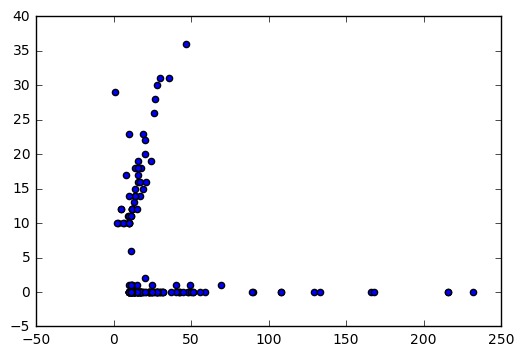

In [89]:
line_scatter(lines, title='Points representing all detected lines in image', xlabel='abs horizontal projection', ylabel='abs vertical projection')

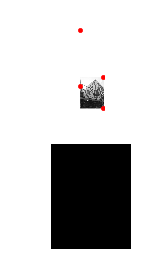

In [123]:
import math
import matplotlib.pyplot as plt

from skimage.io import imread, imsave
from skimage import transform as tf

src = np.array([[0, 0], [0, H], [W, H], [W, 0]])
dst = np.array([[0, a], [0, b], [W, H], [W, 0]])
#dst = np.array([[0, b], [0, a], [W, H], [W, 0]])

tform3 = tf.ProjectiveTransform()
tform3.estimate(src, dst)
warped = tf.warp(img, tform3, output_shape=img.shape)
imsave(pathname+'/warped.jpg',warped)
cv2.imshow('warped',warped)

fig, figAx = plt.subplots(nrows=2, figsize=(8, 3))

figAx[0].imshow(gray, cmap=plt.cm.gray)
figAx[0].plot(dst[:, 0], dst[:, 1], '.r')
#figAx[1].imshow(warped, cmap=plt.cm.gray)
figAx[1].imshow(warped)

for ax in figAx:
    ax.axis('off')
    
cv2.waitKey(0) 
cv2.destroyAllWindows()

In [ ]:
# attempt using Sobel derivates did not work...
# ksize = 3
# # dx = cv2.Sobel(gray, cv2.CV_16S, 1, 0, ksize)
# # dy = cv2.Sobel(gray, cv2.CV_16S, 0, 1, ksize)
# dx = cv2.Scharr(gray, cv2.CV_16S, 1, 0)
# dy = cv2.Scharr(gray, cv2.CV_16S, 0, 1)
# with np.errstate(divide='ignore', invalid='ignore'):
#     m = np.true_divide(dy,dx)
# m[ dx == 0 ] = 0
# # # http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_features_harris/py_features_harris.html
# # k = 0.04
# # eig = cv2.cornerEigenValsAndVecs(gray, 5, 3)
# # eigVal0 = eig[:,:,0]
# # eigVal1 = eig[:,:,1]
# # R = np.multiply(eigVal0,eigVal1) - k*(eigVal0 + eigVal1)**2
# # isEdge = R < 0

# # # discard non-edges
# # m[np.logical_not(isEdge)] = 0
# # cv2.imshow('posSlope', np.multiply(m, m > 0))
# # cv2.imshow('negSlope', -1*np.multiply(m, m < 0))
# # cv2.waitKey(0) 
# # cv2.destroyAllWindows()

# hwIdx = np.unravel_index(range(0,H*W),(H, W))
# hIdx = hwIdx[0]
# wIdx = hwIdx[1]
# m = np.reshape(m,[-1,])


# #isEdge = np.reshape(isEdge,[-1,])


# # # bl2tr = -
# # # limit slope values
# # m_thresh = 0.5*h/w
# # selectEdge = np.logical_and(isEdge, np.absolute(m) < m_thresh)
# # # only consider selected edges
# # hIdx = hIdx[selectEdge]
# # wIdx = wIdx[selectEdge]
# # m = m[selectEdge]
# # a = np.column_stack( ( np.ones((m.shape[0],)), m ) )
# # b = hIdx - m*wIdx
# # x = np.linalg.lstsq(a,b)
# # x

# # bl2tr = +
# # limit slope values
# m_thresh = 0.8*H/W
# #canny =np.reshape(canny,[-1,])
# #selectEdge = np.logical_and(np.logical_and(isEdge, np.absolute(m) < m_thresh), canny > 0)

# selectEdge = m != 0
# #selectEdge = isEdge

# # only consider selected edges
# hIdx = hIdx[selectEdge]
# wIdx = wIdx[selectEdge]
# m = m[selectEdge]
# # Solve Ax = B
# A = np.column_stack( ( np.ones((m.shape[0],)), -m ) )
# B = hIdx + m*wIdx
# x = np.linalg.lstsq(A, B)
# g = x[0][0]
# # Why x[0][1] is negative?!?
# # And why is Sobel output negated?? ... related?
# d = x[0][1]
# a = g - d*g/(d + W)
# b = d*(H - g)/(d + W) + g
# a,b,g,d

In [ ]:
# unused stuff
#
# k = 0.04
# eig = cv2.cornerEigenValsAndVecs(gray, 5, 3)
# eigVal0 = eig[:,:,0]
# eigVal1 = eig[:,:,1]
# x0 = eig[:,:,2]
# y0 = eig[:,:,3]
# x1 = eig[:,:,4]
# y1 = eig[:,:,5]
# # http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_features_harris/py_features_harris.html
# R = np.multiply(eigVal0,eigVal1) - k*(eigVal0 + eigVal1)**2
# isEdge = R < 0
# with np.errstate(divide='ignore', invalid='ignore'):
#     m0 = np.true_divide(y0,x0)
# m0[ x0 == 0 ] = 0
# with np.errstate(divide='ignore', invalid='ignore'):
#     m1 = np.true_divide(y1,x1)
# m1[ x1 == 0 ] = 0
# m = np.multiply(eigVal0 > eigVal1, m0) + np.multiply(eigVal1 > eigVal0, m1)
# hwIdx = np.unravel_index(range(0,h*w),(h,w))
# hIdx = hwIdx[0]
# wIdx = hwIdx[1]
# m = np.reshape(m,[-1,])
# isEdge = np.reshape(isEdge,[-1,])
# # only consider edges
# hIdx = hIdx[isEdge]
# wIdx = wIdx[isEdge]
# m = m[isEdge]


# # edgeSlopes = np.multiply(isEdge,m)
# # posSlopeEdge = np.multiply(edgeSlopes, edgeSlopes > 0)
# # negSlopeEdge = np.multiply(edgeSlopes, edgeSlopes < 0)
# # cv2.imshow('posSlope', posSlopeEdge)
# # cv2.imshow('negSlope', -1*negSlopeEdge)
# # cv2.waitKey(0) 
# # cv2.destroyAllWindows()


In [ ]:
m1d = np.absolute(np.true_divide(lines[:,3] - lines[:,1], lines[:,2] - lines[:,0])).T
plt.hist(m1d, bins=np.linspace(0,2,10))
plt.show()

In [ ]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

In [86]:
# cv2.CV_PI = 3.1415926535897932384626433832795
# thrs1 = 50
# thrs2 = 200
# canny = cv2.Canny(gray, thrs1, thrs2, apertureSize=3)
# #lines = cv2.HoughLinesP(canny,1, cv2.CV_PI/180, 80, 30, 10)[:,0,:]
# # args: image, rho, theta, threshold, lines, minLineLength, maxLineGap
# rho = 1
# theta = cv2.CV_PI/180
# threshold = 200
# min_line_len = 100
# max_line_gap = 100
# lines = cv2.HoughLinesP(canny, rho, theta, threshold, np.array([]), min_line_len, max_line_gap)[:,0,:]
# color_dst = cv2.cvtColor(canny,cv2.COLOR_GRAY2BGR)
# for i in range(0,lines.shape[0]):
#     cv2.line(color_dst,(lines[i][0],lines[i][1]), (lines[i][2],lines[i][3]),(0,0,255),3,8 )
# print lines.shape
# imshow(color_dst)

(19, 4)
